<a href="https://colab.research.google.com/github/davidofitaly/06_reduction_dimensions_projects/blob/main/02_tsne_fashion_mnist_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data loading](#1)
3. [Visualization of data](#2)
4. [Normalization](#3)
5. [PCA - 2 components](#4)
6. [PCA - 3 components](#5)
7. [PCA - 0.95](#6)
8. [Comparison of the percentage of explained variance](#7)
9. [t-SNE - 2 components](#8)
10. [t-SNE - 3 components](#9)
11. [Combination of PCA and t-SNE](#10)

### <a name='0'> </a> Import of libraries

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')

Pandas: 2.2.2
Numpy: 1.26.4


### <a name='1'> </a> Data loading

In [ ]:
# Import the Fashion MNIST dataset from Keras
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset, splitting it into training and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


### <a name='2'> </a> Visualization of data

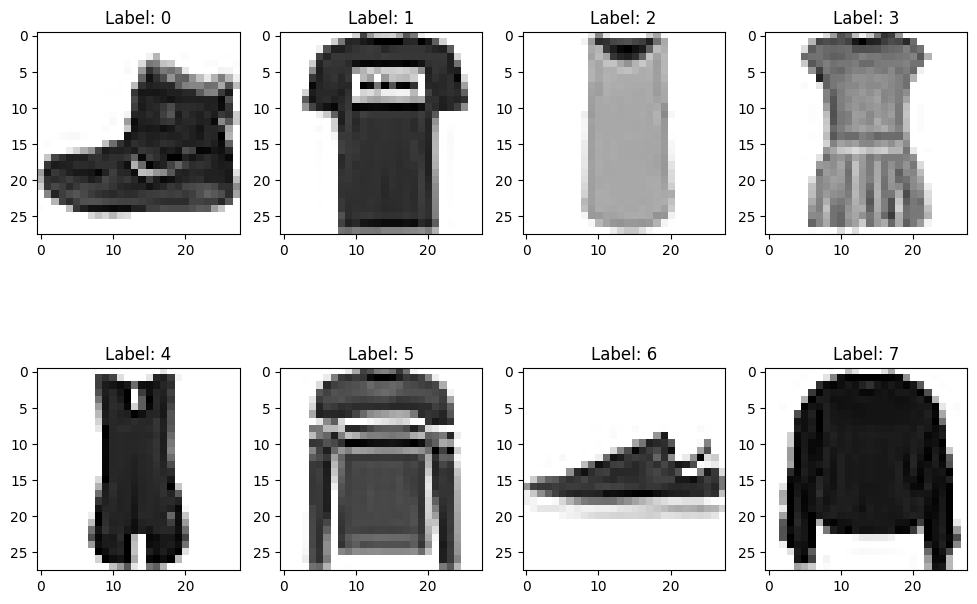

In [ ]:
# Displaying the first 8 images from the Fashion dataset with their corresponding labels
plt.figure(figsize=(12,8))

for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {i}')
plt.show()

### <a name='3'> </a> Normalization

In [ ]:
# Reshape the training and test images from 28x28 pixels to a flat array of 784 pixels (28 * 28)
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:10000]
y_test = y_test[:10000]

X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.
X_test = X_test.reshape(-1, 28 * 28).astype('float') / 255.

X_train.shape

(10000, 784)

### <a name='4'> </a> PCA - 2 components

In [ ]:
# Applying PCA to reduce the dimensionality of the standardized data to 2 principal components
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train)

X_train_pca_2.shape

(10000, 2)

In [ ]:
# Creating a DataFrame to hold the PCA results and the corresponding class labels
df_pca_2 = pd.DataFrame(data={'pca_1': X_train_pca_2[:, 0], 'pca_2': X_train_pca_2[:,1], 'class': y_train})
df_pca_2[:10]

pca_1     pca_2  class
0 -0.548507  6.373695      9
1  5.497914 -1.719924      0
2 -2.815930 -4.339008      0
3  0.145271 -3.837212      3
4  3.179692 -4.685064      0
5  4.599277  2.022319      2
6 -5.875738  1.316889      7
7  7.088602  6.655279      2
8 -6.199988 -1.587500      5
9 -3.717177  1.574110      5

In [ ]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca_2 = pd.DataFrame(data={'explained_variance_ratio': pca_2.explained_variance_ratio_})
results_pca_2['cumulative'] = results_pca_2['explained_variance_ratio'].cumsum()
results_pca_2['component'] = results_pca_2.index + 1

results_pca_2

explained_variance_ratio  cumulative  component
0                  0.290572    0.290572          1
1                  0.180126    0.470698          2

In [ ]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca_2['component'], y=results_pca_2['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca_2['component'], y=results_pca_2['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 2 components', width=1000, template='ggplot2'))

fig.show()

In [ ]:
px.scatter(df_pca_2, 'pca_1', 'pca_2', color=df_pca_2['class'], width=1000, title='PCA - 2 components')

### <a name='5'> </a> PCA - 3 components

In [ ]:
# Applying PCA to reduce the dimensionality of the standardized data to 3 principal components
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train)

X_train_pca_3.shape

(10000, 3)

In [ ]:
# Creating a DataFrame to hold the PCA results and the corresponding class labels
df_pca_3 = pd.DataFrame(data={'pca_1': X_train_pca_3[:, 0], 'pca_2': X_train_pca_3[:,1], 'pca_3': X_train_pca_3[:,2],'class': y_train})
df_pca_3[:10]

pca_1     pca_2     pca_3  class
0 -0.548507  6.373695 -4.779175      9
1  5.497914 -1.719924 -0.945493      0
2 -2.815930 -4.339008  0.462955      0
3  0.145271 -3.837212  0.834593      3
4  3.179692 -4.685064 -2.874376      0
5  4.599277  2.022319  2.455533      2
6 -5.875738  1.316889  0.656547      7
7  7.088602  6.655279  1.379297      2
8 -6.199988 -1.587500  0.458668      5
9 -3.717177  1.574110 -0.261625      5

In [ ]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca_3 = pd.DataFrame(data={'explained_variance_ratio': pca_3.explained_variance_ratio_})
results_pca_3['cumulative'] = results_pca_3['explained_variance_ratio'].cumsum()
results_pca_3['component'] = results_pca_3.index + 1

results_pca_3

explained_variance_ratio  cumulative  component
0                  0.290572    0.290572          1
1                  0.180126    0.470698          2
2                  0.059592    0.530290          3

In [ ]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca_3['component'], y=results_pca_3['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca_3['component'], y=results_pca_3['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 2 components', width=1000, template='ggplot2'))

fig.show()

In [ ]:
px.scatter_3d(df_pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', opacity=0.8, size_max=8, width=1000, title='PCA - 3 components')

### <a name='6'> </a> PCA - 0.95

In [ ]:
# Perform PCA to reduce dimensionality while retaining 95% of the variance in the data.
pca_95 = PCA(n_components=0.95)
X_train_pca_95 = pca_95.fit_transform(X_train)

X_train_pca_95.shape

(10000, 182)

In [ ]:
# Creating a DataFrame to store the explained variance ratios and cumulative explained variance of the PCA components
results_pca_95 = pd.DataFrame(data={'explained_variance_ratio': pca_95.explained_variance_ratio_})
results_pca_95['cumulative'] = results_pca_95['explained_variance_ratio'].cumsum()
results_pca_95['component'] = results_pca_95.index + 1

results_pca_95

explained_variance_ratio  cumulative  component
0                    0.290572    0.290572          1
1                    0.180126    0.470698          2
2                    0.059592    0.530290          3
3                    0.049458    0.579748          4
4                    0.038431    0.618179          5
..                        ...         ...        ...
177                  0.000314    0.949023        178
178                  0.000311    0.949335        179
179                  0.000310    0.949644        180
180                  0.000309    0.949954        181
181                  0.000307    0.950261        182

[182 rows x 3 columns]

In [ ]:
# Creating a figure to visualize the explained variance ratio and cumulative explained variance of PCA components
fig = go.Figure(data=[go.Bar(x=results_pca_95['component'], y=results_pca_95['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results_pca_95['component'], y=results_pca_95['cumulative'], name='cumulative')],
                      layout=go.Layout(title='PCA - 2 components', width=1000, template='ggplot2'))

fig.show()

### <a name='7'> </a> Comparison of the percentage of explained variance

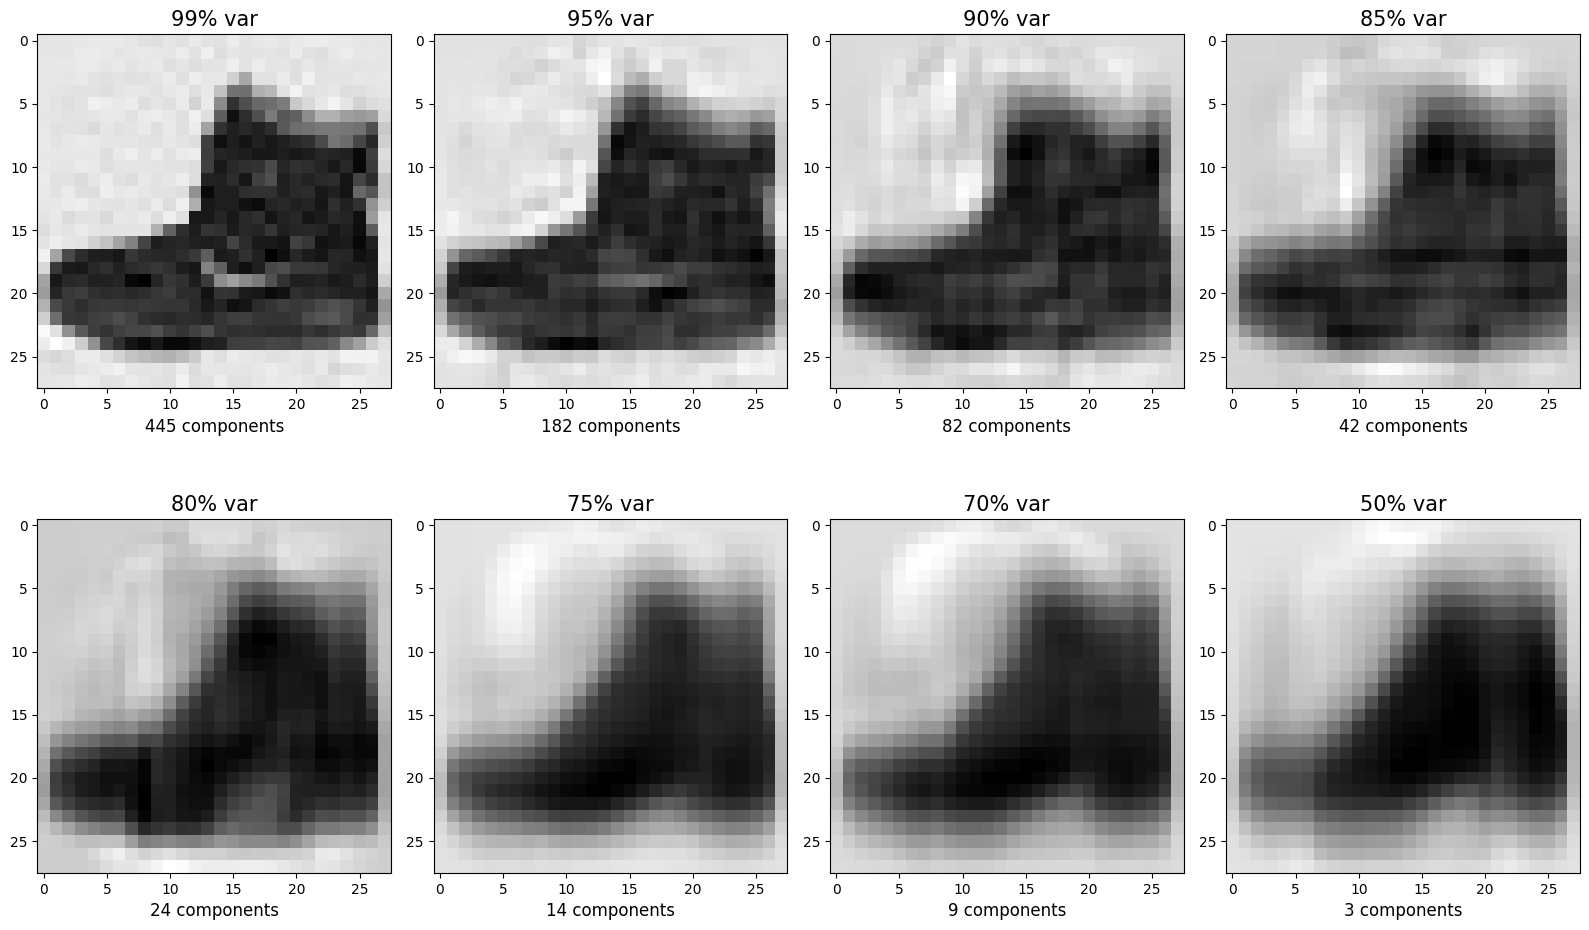

In [ ]:
def make_pca(n_components, data, idx=0):
    # PCA
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)

    # Inverse transformation to approximate the original image
    approx = pca.inverse_transform(data_pca)

    # Displaying the reconstructed image
    plt.imshow(approx[idx].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.xlabel(f'{pca.n_components_} components', color='black', fontsize=12)
    plt.title(f'{int(n_components * 100)}% var', color='black', fontsize=15)

# Creating a chart with different explained variances
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns of subplots
    make_pca(val, X_train)

plt.tight_layout()
plt.show()

### <a name='8'> </a> t-SNE - 2 components

In [ ]:
# Import the TSNE class from the sklearn manifold module for dimensionality reduction
from sklearn.manifold import TSNE

tsne_2 = TSNE(n_components=2, verbose=1)
X_train_tsne_2 = tsne_2.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 6.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.698406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.675980
[t-SNE] KL divergence after 1000 iterations: 1.595801


In [ ]:
# Creating a DataFrame to hold the t-SNE results and the corresponding class labels
df_tsne_2 = pd.DataFrame(data={'tsne_1': X_train_tsne_2[:, 0], 'tsne_2': X_train_tsne_2[:,1], 'class': y_train})
df_tsne_2[:10]

tsne_1     tsne_2  class
0 -32.842052  46.614704      9
1  39.444107 -52.971313      0
2  -0.473574 -19.467035      0
3   5.684664 -19.749376      3
4   8.805938 -43.196281      0
5  38.445877  34.239586      2
6 -65.715630 -12.543031      7
7  48.669319  48.435688      2
8 -18.640650  14.120236      5
9 -21.894581  20.662289      5

In [ ]:
px.scatter(df_tsne_2, 'tsne_1', 'tsne_2', color=df_tsne_2['class'], width=1000, title='t-SNE - 2 components')

### <a name='9'> </a> t-SNE - 3 components

In [ ]:
tsne_3 = TSNE(n_components=3, verbose=1)
X_train_tsne_3 = tsne_3.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 6.302s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.698406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.047874
[t-SNE] KL divergence after 1000 iterations: 1.409252


In [ ]:
# Creating a DataFrame to hold the t-SNE results and the corresponding class labels
df_pca_3 = pd.DataFrame(data={'tsne_1': X_train_tsne_3[:, 0], 'tsne_2': X_train_tsne_3[:,1], 'tsne_3': X_train_tsne_3[:,2],'class': y_train})
df_pca_3[:10]

tsne_1     tsne_2     tsne_3  class
0  -5.128397   8.220586 -16.120682      9
1  16.934340   0.687353  -8.637113      0
2   4.076092  -6.775227  -5.609634      0
3   7.072211  -5.791485  -6.441003      3
4   9.730378 -15.087388  -8.132902      0
5   8.998409  10.501647   8.047546      2
6 -17.710566   2.233439  12.199593      7
7   9.636846  15.559850   6.753513      2
8  -6.593011  -4.923517  -8.471005      5
9  -9.982436  -4.433023 -11.651988      5

In [ ]:
px.scatter_3d(df_pca_3, x='tsne_1', y='tsne_2', z='tsne_3', color='class', opacity=0.8, size_max=8, width=1000, title= 't-SNE - 3 components')

### <a name='10'> </a> Combination of PCA and t-SNE

- PCA

In [ ]:
pca_50 = PCA(n_components=50)
X_train_pca_50 = pca_50.fit_transform(X_train)

X_train_pca_50.shape

(10000, 50)

- t-SNE after PCA (2 components)

In [ ]:
tsne  = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca_50)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.398391
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.036613
[t-SNE] KL divergence after 1000 iterations: 1.500251


In [ ]:
# Creating a DataFrame to hold the t-SNE results and the corresponding class labels
df_X_train_tsne_50 = pd.DataFrame(data={'tsne_1': X_train_tsne_50[:, 0], 'tsne_2': X_train_tsne_50[:,1], 'class': y_train})
df_X_train_tsne_50[:10]

tsne_1     tsne_2  class
0  -3.780720   8.764786      9
1  15.585920   1.775475      0
2   3.027697  -7.600125      0
3   6.173046  -6.036047      3
4   9.329981 -14.124727      0
5   7.601912   8.358811      2
6 -18.429644   6.519130      7
7   8.785694  13.978300      2
8 -10.278265  -4.985360      5
9 -12.077329  -2.691292      5

In [ ]:
px.scatter(df_X_train_tsne_50, 'tsne_1', 'tsne_2', color= df_X_train_tsne_50['class'], width=1000, title='t-SNE - 2 components after PCA')

- t-SNE after PCA (3 components)

In [ ]:
tsne  = TSNE(n_components=3, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca_50)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.398391
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.262970
[t-SNE] KL divergence after 1000 iterations: 1.331145


In [ ]:
# Creating a DataFrame to hold the t-SNE results and the corresponding class labels
df_X_train_tsne_50= pd.DataFrame(data={'tsne_1': X_train_tsne_50[:, 0], 'tsne_2': X_train_tsne_50[:,1], 'tsne_3': X_train_tsne_50[:,2],'class': y_train})
df_X_train_tsne_50[:10]

tsne_1     tsne_2     tsne_3  class
0  -3.780720   8.764786 -15.377468      9
1  15.585920   1.775475 -11.702853      0
2   3.027697  -7.600125  -5.355979      0
3   6.173046  -6.036047  -5.368989      3
4   9.329981 -14.124727  -7.696260      0
5   7.601912   8.358811   8.603882      2
6 -18.429644   6.519130  11.410506      7
7   8.785694  13.978300   8.114620      2
8 -10.278265  -4.985360  -9.699056      5
9 -12.077329  -2.691292 -13.579337      5

In [ ]:
px.scatter_3d(df_X_train_tsne_50, x='tsne_1', y='tsne_2', z='tsne_3', color='class', opacity=0.8, size_max=8, width=1000, title= 't-SNE - 3 components after PCA')

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=['PCA', 't-SNE', 't-SNE after PCA'], horizontal_spacing=0.03)

fig1 = px.scatter(df_pca_2, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(df_tsne_2, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3 = px.scatter(df_X_train_tsne_50, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
    fig.add_trace(fig3['data'][i], row=1, col=3)
fig.update_layout(width=1200, height=450, showlegend=False, template='plotly_dark')
fig.show()